## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [6]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp_f = Path("../Challenge#3/bitstamp.csv")
bitstamp_df = pd.read_csv(bitstamp_f,index_col="Timestamp", infer_datetime_format=True, parse_dates=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [7]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [13]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase_f = Path("../Challenge#3/coinbase.csv")
coinbase_df = pd.read_csv(coinbase_f, index_col="Timestamp", infer_datetime_format=True, parse_dates=True)

In [14]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [15]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp_df.dropna()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [28]:
# Use the str.replace function to remove the dollar sign, $
bitstamp_df["Close"] = bitstamp_df["Close"].str.replace("$", '', regex=True)
bitstamp_df.head()

AttributeError: Can only use .str accessor with string values!

### Step 3: Convert the data type of the Close column to a `float`.

In [22]:
# Convert the Close data type to a float
bitstamp_df["Close"] = bitstamp_df['Close'].astype(float)
bitstamp_df.types

AttributeError: 'DataFrame' object has no attribute 'types'

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [26]:
# Review the data for duplicate values, and drop them if necessary
bitstamp_df.drop_duplicates(keep="first", inplace=True)


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [27]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase_df.dropna()
coinbase_df['Close']=coinbase_df['Close'].str.replace('$','',regex=False)
coinbase_df['Close']=pd.to_numeric(coinbase_df['Close'],errors='coerce')
coinbase_df.drop_duplicates(keep="first", inplace=True)

AttributeError: Can only use .str accessor with string values!

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [29]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp_df.loc[:,['Close']]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [30]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase_df.loc[:,["Close"]]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [199]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()


count        5.000000
mean     13634.908000
std         19.695095
min      13610.220000
25%      13620.000000
50%      13639.090000
75%      13646.480000
max      13658.750000
Name: Close, dtype: float64

In [255]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()


count        5.000000
mean     13584.786000
std         22.681798
min      13550.340000
25%      13580.000000
50%      13583.440000
75%      13601.660000
max      13608.490000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

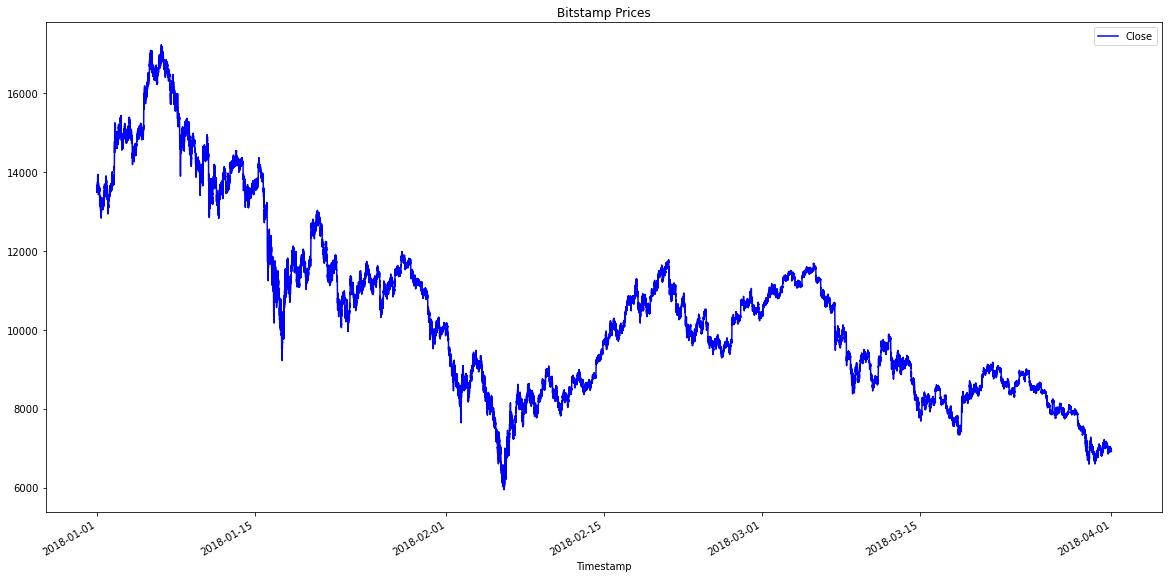

In [31]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(20,10), title='Bitstamp Prices', color='blue')

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

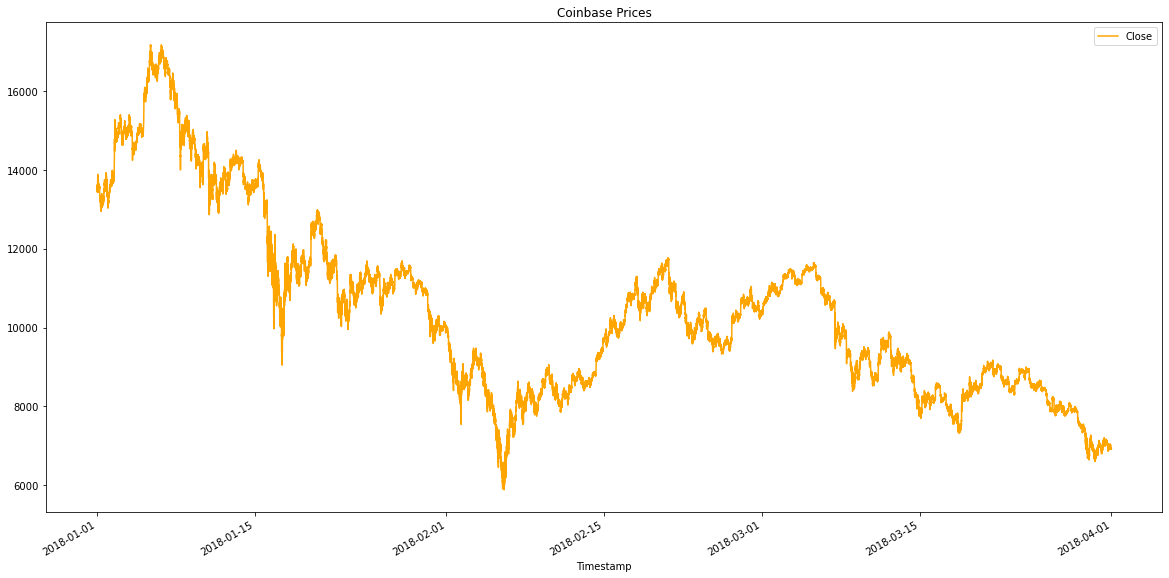

In [32]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(20,10), title='Coinbase Prices', color='orange')

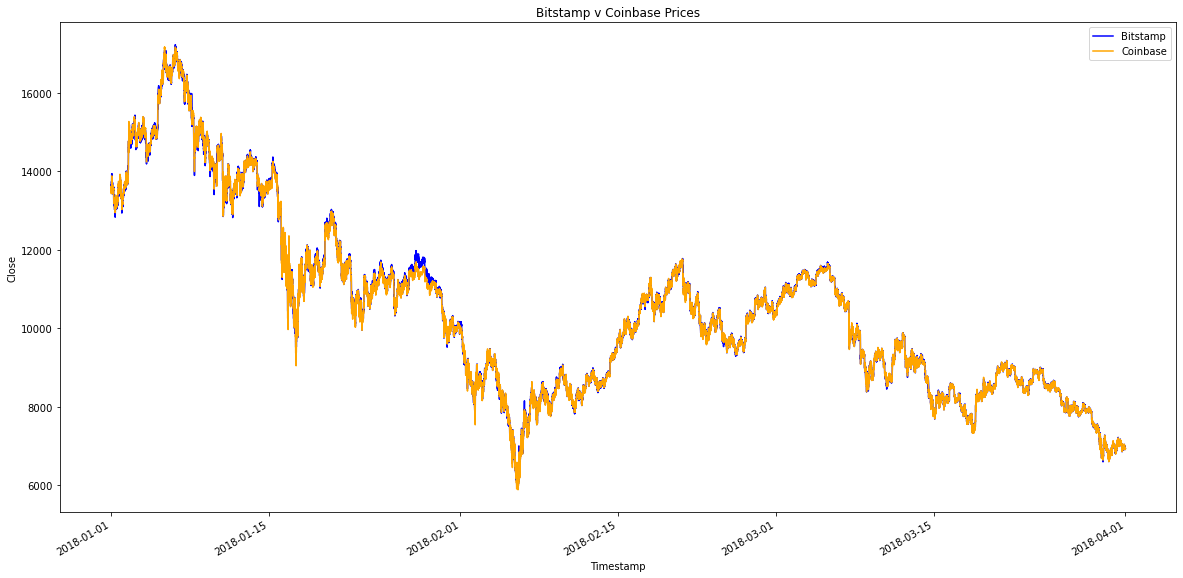

In [33]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

ax = bitstamp_sliced.plot(figsize=(20,10), title='Bitstamp v Coinbase Prices', color='blue', 
                          legend=True, ylabel='Close')
coinbase_sliced.plot(ax=ax, color='orange')
ax.legend(['Bitstamp','Coinbase'])




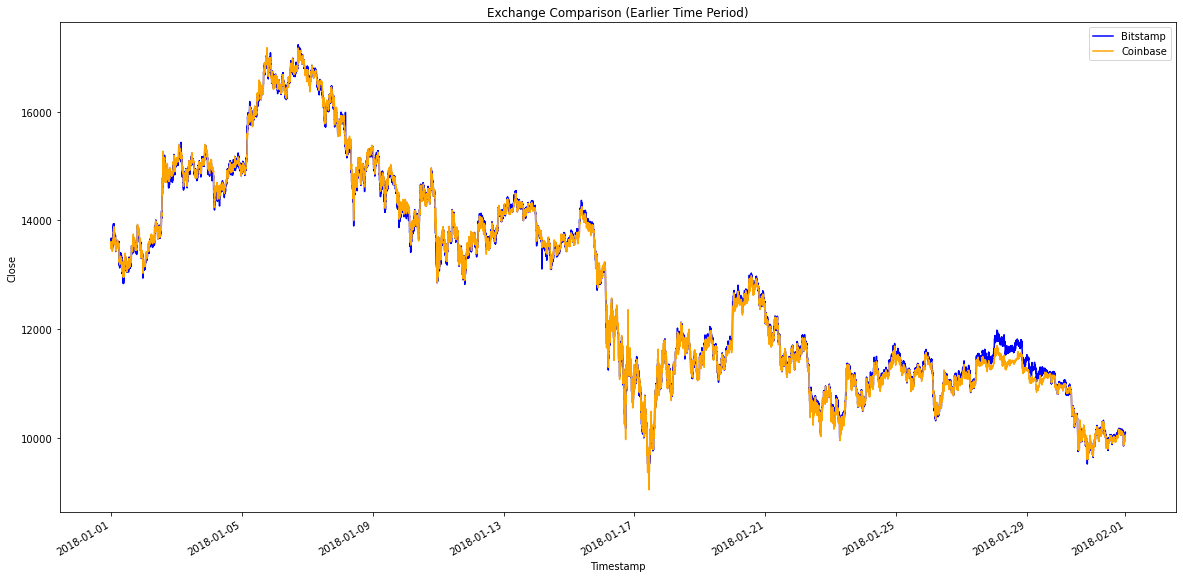

In [34]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE

ax2 = bitstamp_sliced.loc['2018-01'].plot(figsize=(20,10), title='Exchange Comparison (Earlier Time Period)', color='blue', 
                          legend=True, ylabel='Close')
coinbase_sliced.loc['2018-01'].plot(ax=ax2, color='orange')
ax2.legend(['Bitstamp','Coinbase'])

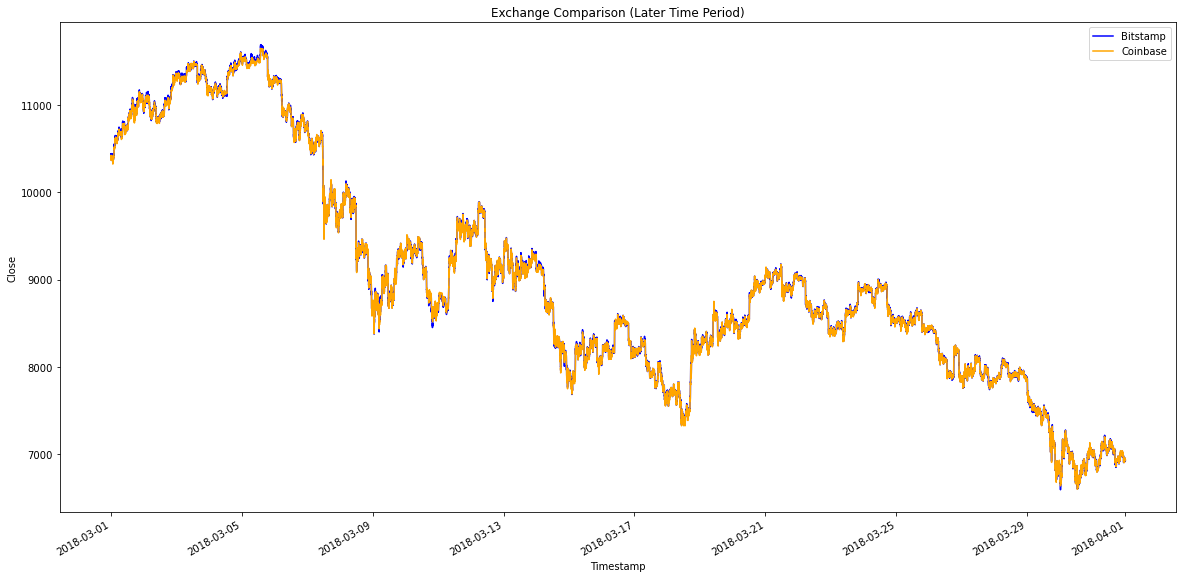

In [35]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
ax3 = bitstamp_sliced.loc['2018-03'].plot(figsize=(20,10), title='Exchange Comparison (Later Time Period)', color='blue', 
                          legend=True, ylabel='Close')
coinbase_sliced.loc['2018-03'].plot(ax=ax3, color='orange')
ax3.legend(['Bitstamp','Coinbase'])

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

It seems that the general decline in the graph is met with the uptick in price at the beginning of January and March, However it's not enough to recover the overal price drop that seems to be occuring.  People interested in purchasing might have bought in Bitstamp and Coinbase when both found their resistance support in early February and rode the increase in price that topped in late March in the form of a swing trade.  

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

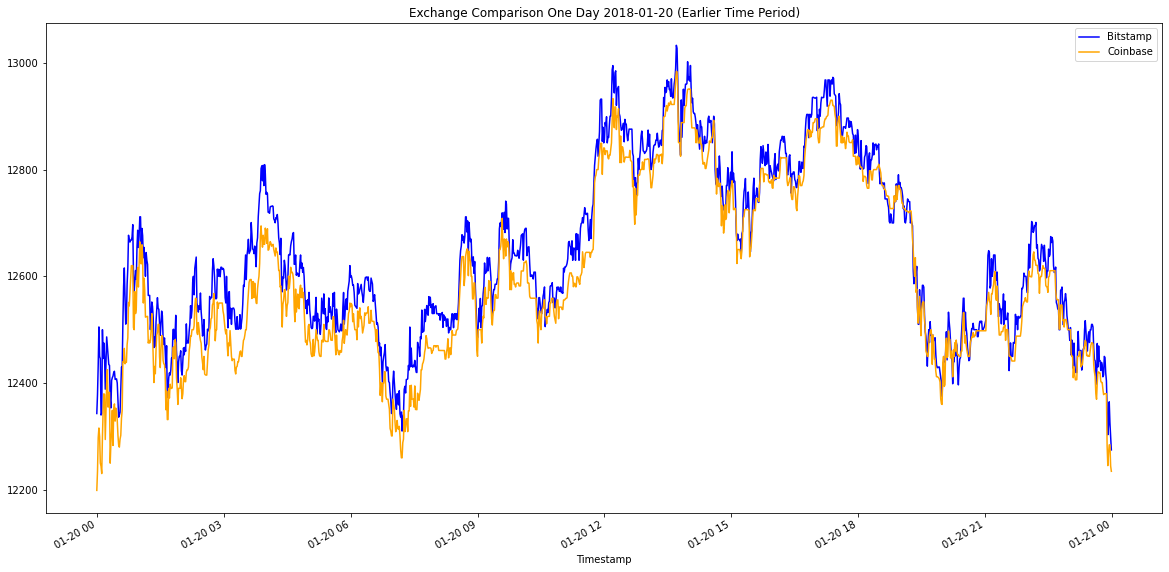

In [36]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
early_date="2018-01-20"
ax4 = bitstamp_sliced.loc[early_date].plot(figsize=(20,10),
                                             title=f'Exchange Comparison One Day {early_date} (Earlier Time Period)',color='blue')
coinbase_sliced.loc[early_date].plot(ax=ax4, color='orange')
ax4.legend(['Bitstamp','Coinbase'])

In [37]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced.loc[early_date] - bitstamp_sliced.loc[early_date]
# Generate summary statistics for the early DataFrame
# YOUR CODE HERE
arbitrage_spread_early.describe()

,Close
count,1437.000000
mean,-42.888163
std,29.990035
min,-200.500000
25%,-60.020000
50%,-41.460000
75%,-24.280000
max,56.350000


Text(0.5, 1.0, 'Arbitrage Spread One Day 2018-01-20 (Earlier Time Period')

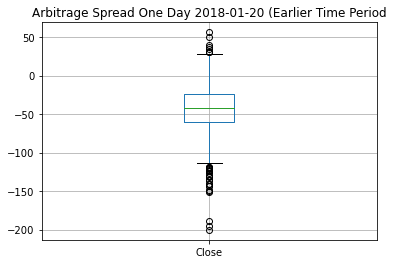

In [38]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# YOUR CODE HERE 
ax5=arbitrage_spread_early.boxplot()
ax5.set_title(f'Arbitrage Spread One Day {early_date} (Earlier Time Period')

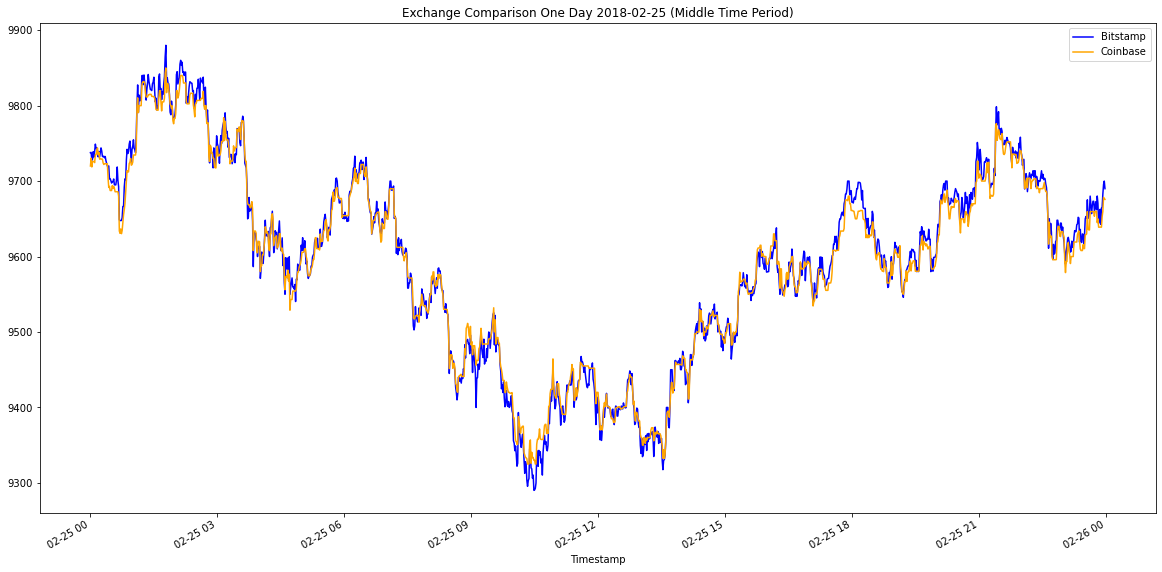

In [39]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
middle_date='2018-02-25'
ax5 = bitstamp_sliced.loc[middle_date].plot(figsize=(20,10),
                                             title=f'Exchange Comparison One Day {middle_date} (Middle Time Period)',color='blue')
coinbase_sliced.loc[middle_date].plot(ax=ax5, color='orange')
ax5.legend(['Bitstamp','Coinbase'])

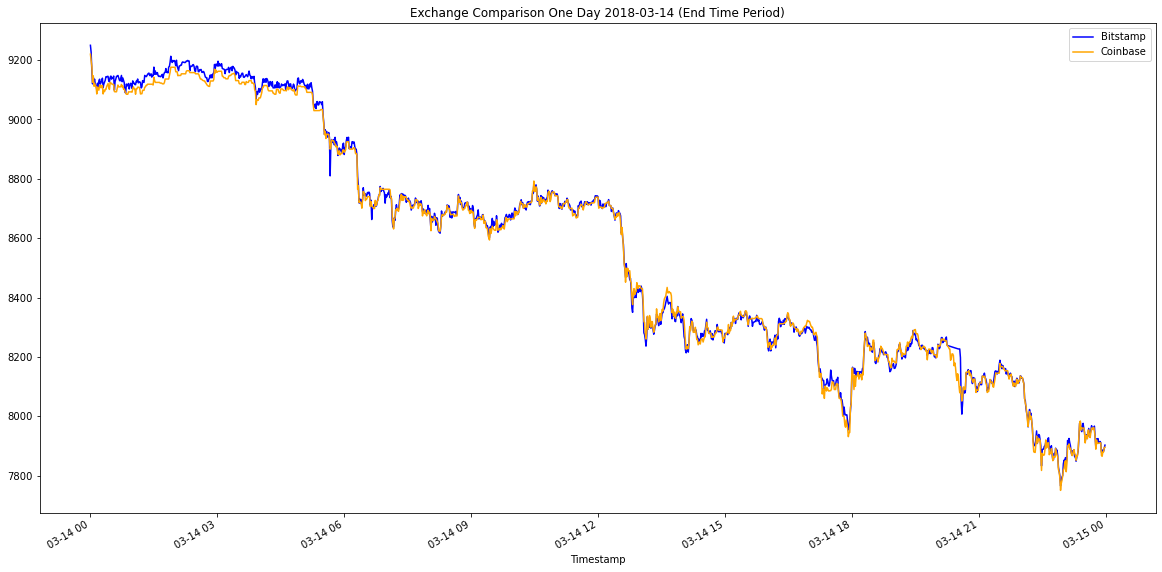

In [40]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
late_date='2018-03-14'
ax7 = bitstamp_sliced.loc[late_date].plot(figsize=(20,10),
                                             title=f'Exchange Comparison One Day {late_date} (End Time Period)',color='blue')
coinbase_sliced.loc[late_date].plot(ax=ax7, color='orange')
ax7.legend(['Bitstamp','Coinbase'])

In [41]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced.loc[late_date] - bitstamp_sliced.loc[late_date]

# Generate summary statistics for the late DataFrame
# YOUR CODE HERE
arbitrage_spread_late.describe()

,Close
count,1425.000000
mean,-6.731404
std,16.322187
min,-147.650000
25%,-16.600000
50%,-6.000000
75%,2.910000
max,90.010000


Text(0.5, 1.0, 'Arbitrage Spread One Day 2018-03-14 (End Time Period')

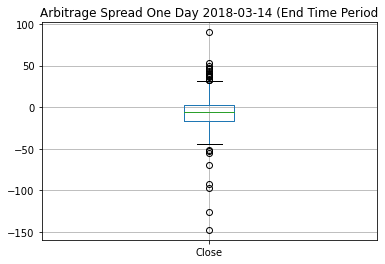

In [42]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# YOUR CODE HERE
ax8=arbitrage_spread_late.boxplot()
ax8.set_title(f'Arbitrage Spread One Day {late_date} (End Time Period')

In [43]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced.loc[middle_date] - bitstamp_sliced.loc[middle_date]

# Generate summary statistics 
# YOUR CODE HERE
arbitrage_spread_middle.describe()

,Close
count,1432.000000
mean,-2.994050
std,12.592215
min,-39.990000
25%,-11.375000
50%,-3.335000
75%,4.652500
max,56.050000


Text(0.5, 1.0, 'Arbitrage Spread One Day 2018-02-25 (Middle Time Period')

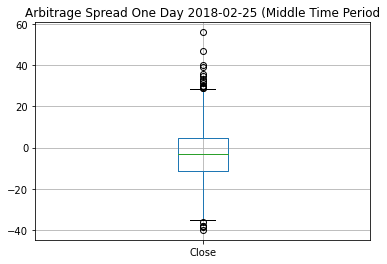

In [44]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# YOUR CODE HERE
ax6=arbitrage_spread_middle.boxplot()
ax6.set_title(f'Arbitrage Spread One Day {middle_date} (Middle Time Period')

In [46]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting
#example df[column_1, axis=1].min() will give you the minimum valuethe bitstamp lower closing prices from the coinbase higher closing prices
#
arbitrage_spread_early = (coinbase_sliced - bitstamp_sliced)
print(arbitrage_spread_early)

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

                     Close
Timestamp                 
2018-03-14 00:00:00 -30.00
2018-03-14 00:01:00 -28.76
2018-03-14 00:02:00  15.03
2018-03-14 00:03:00   5.03
2018-03-14 00:04:00   3.66
...                    ...
2018-03-14 23:55:00  -8.78
2018-03-14 23:56:00  -7.04
2018-03-14 23:57:00  -2.27
2018-03-14 23:58:00   2.06
2018-03-14 23:59:00  -7.54

[1440 rows x 1 columns]


,Close
count,1425.000000
mean,-6.731404
std,16.322187
min,-147.650000
25%,-16.600000
50%,-6.000000
75%,2.910000
max,90.010000


In [48]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = (coinbase_sliced - bitstamp_sliced)
print(arbitrage_spread_middle)
# Generate summary statistics 
arbitrage_spread_middle.describe()

                     Close
Timestamp                 
2018-03-14 00:00:00 -30.00
2018-03-14 00:01:00 -28.76
2018-03-14 00:02:00  15.03
2018-03-14 00:03:00   5.03
2018-03-14 00:04:00   3.66
...                    ...
2018-03-14 23:55:00  -8.78
2018-03-14 23:56:00  -7.04
2018-03-14 23:57:00  -2.27
2018-03-14 23:58:00   2.06
2018-03-14 23:59:00  -7.54

[1440 rows x 1 columns]


,Close
count,1425.000000
mean,-6.731404
std,16.322187
min,-147.650000
25%,-16.600000
50%,-6.000000
75%,2.910000
max,90.010000


In [49]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = (coinbase_sliced - bitstamp_sliced)
print(arbitrage_spread_late)

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

                     Close
Timestamp                 
2018-03-14 00:00:00 -30.00
2018-03-14 00:01:00 -28.76
2018-03-14 00:02:00  15.03
2018-03-14 00:03:00   5.03
2018-03-14 00:04:00   3.66
...                    ...
2018-03-14 23:55:00  -8.78
2018-03-14 23:56:00  -7.04
2018-03-14 23:57:00  -2.27
2018-03-14 23:58:00   2.06
2018-03-14 23:59:00  -7.54

[1440 rows x 1 columns]


,Close
count,1425.000000
mean,-6.731404
std,16.322187
min,-147.650000
25%,-16.600000
50%,-6.000000
75%,2.910000
max,90.010000


In [463]:
arbitrage_spread_late[arbitrage_spread_late>0].describe( )

,Close
count,466.000000
mean,9.724914
std,9.707754
min,0.010000
25%,3.017500
50%,6.975000
75%,12.757500
max,90.010000


### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [50]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_sliced.loc[early_date] - bitstamp_sliced.loc[early_date]
arbitrage_spread_early = arbitrage_spread_early[arbitrage_spread_early['Close'] > 0]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
arbitrage_spread_early.describe()

KeyError: '2018-01-20'

In [51]:
arbitrage_spread_middle[arbitrage_spread_middle>0].describe()


,Close
count,466.000000
mean,9.724914
std,9.707754
min,0.010000
25%,3.017500
50%,6.975000
75%,12.757500
max,90.010000


In [52]:
arbitrage_spread_late[arbitrage_spread_late>0].describe()

,Close
count,466.000000
mean,9.724914
std,9.707754
min,0.010000
25%,3.017500
50%,6.975000
75%,12.757500
max,90.010000


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [53]:
# For the date early in the dataset, calculate the spread returns by dividing the instances 
# when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early.loc[early_date]/bitstamp_sliced.loc[early_date]

# Review the spread return DataFrame
# YOUR CODE HERE
spread_return_early.head()


KeyError: '2018-01-20'

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [54]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early['Close'] > 0.01]

# Review the first five profitable trades
# YOUR CODE HERE
profitable_trades_early.head()

NameError: name 'spread_return_early' is not defined

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [55]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

NameError: name 'profitable_trades_early' is not defined

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [56]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early*bitstamp_sliced.loc[early_date]

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
# YOUR CODE HERE
profit_per_trade_early

NameError: name 'profitable_trades_early' is not defined

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [57]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.describe()

NameError: name 'profit_per_trade_early' is not defined

In [58]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.plot(figsize=(20,10),title=f'Profit per Trade for {early_date} (Early Date)', color='blue')

NameError: name 'profit_per_trade_early' is not defined

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [59]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE
potential_profits=profit_per_trade_early.sum()
potential_profits

NameError: name 'profit_per_trade_early' is not defined

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [60]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early

NameError: name 'profit_per_trade_early' is not defined

In [61]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE
cumulative_profit_early.plot(figsize=(20,10),title=f'Cumulative Profit per Trade for {early_date} (Early Date)', color='blue')

NameError: name 'cumulative_profit_early' is not defined

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** for each of the days, there's a large shift in pricing whether it's positive or negative.  This would indicate day trading needs to be done at the beginning of the trading day or at the end of the trading day. Because there's a finite amount of bitcoin, it drives the price up, and when there's more to be bought up, then the price lowers.  I am not familiar with the behavior of bitcoin during this time, but it seems across these three months there was an increase in liquidity of bitcoin on the market which is why the price is droping.  Because of the remarkable volatility of bitcoin, it attracks a lot of new traders to the market which can cause profits to decrease or even become non-existent. 